# 1. 準備

## 1-1. 作業用ディレクトリ準備

In [ ]:
# マウント
from google.colab import drive 
drive.mount('/content/drive')

# 作業用ディレクトリを作成して移動
EXP_DPATH = '/content/drive/MyDrive/SFC_2021_clip_prefix_caption'
!mkdir -p $EXP_DPATH
%cd $EXP_DPATH

Mounted at /content/drive
/content/drive/MyDrive/SFC_2021_clip_prefix_caption


## 1-2. ライブラリのインストール&インポート

In [ ]:
import os
import sys

# レポジトリをクローンして移動
REPO_DPATH = os.path.join(EXP_DPATH, 'clip-prefix-caption-jp')
if not os.path.exists(REPO_DPATH):
  !git clone https://github.com/ohashi56225/clip-prefix-caption-jp.git
%cd $REPO_DPATH

# 必要ライブラリインストール
!pip install git+https://github.com/openai/CLIP.git
!pip install scikit-image torch transformers sentencepiece
sys.path.append(REPO_DPATH)

# インポート
import json
import random
from test import Predictor
from model import build_model
from IPython.display import display
from google.colab import files

# ついでに後で使う関数も作っておく
def upload_file():
  uploaded = files.upload()
  if not uploaded:
    image_fpath = ''
  elif len(uploaded) == 1:
    image_fpath = list(uploaded.keys())[0]
  else:
    raise RuntimeError("1度に1枚まで")
  return image_fpath

## 1-3. データダウンロード

In [ ]:
# 学習済みモデルの重みをダウンロード
!gdown ***
!unzip checkpoints.zip

# 画像データ
!gdown ***
!unzip data.zip

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--id] url_or_id
gdown: error: unrecognized arguments: data model.py notebooks __pycache__ README.md test.py train.py
unzip:  cannot find or open checkpoints.zip, checkpoints.zip.zip or checkpoints.zip.ZIP.
unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


# 2. COCOデータセットのみ

## 2-1. 学習済みモデルとテスト画像の読み込み

In [ ]:
# 学習済みモデル
coco_model = build_model(model_fpath="checkpoints/coco_prefix-003.pt")

# 推論器
coco_predictor = Predictor(model=coco_model)

# テスト画像ファイルリスト
TEST_IMAGE_FNAME_LIST = json.load(open("data/sfcoco/test_list.json"))

In [ ]:
#@markdown ### 好きな画像をアップロードする場合
#@markdown ローカルにある画像を使いたい場合は，このセルを実行してアップロードしてください．
#@markdown アップロードした画像はカレントディレクトリ直下に吐き出されます．

image_fpath = upload_file()

In [ ]:
#@markdown ### テスト画像リストから選ぶ場合
#@markdown テスト画像リストの画像を使用する場合は，このセルを実行して1枚選択してください．

image_fname = TEST_IMAGE_FNAME_LIST[17] # [1]は福沢諭吉像の画像
# image_fname = random.choice(TEST_IMAGE_FNAME_LIST)
image_fpath = os.path.join("data/sfcoco/images", image_fname)

## 2-2. キャプション生成

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:191: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  f"This sequence already has {self.eos_token}. In future versions this behavior may lead to duplicated eos tokens being added."
/content/drive/MyDrive/SFC_2021_clip_prefix_caption/clip-prefix-caption-jp/test.py:72: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_tokens_source = next_tokens // scores_sum.shape[1]


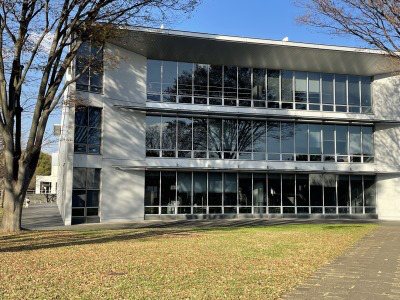

[
  "レンガ造りの建物の真ん中に時計台があります。</s>",
  "レンガ造りの建物の角に時計台があります。</s>",
  "レンガ造りの建物の真ん中に時計があります。</s>",
  "レンガ造りの建物の上部に時計が設置されています。</s>",
  "レンガ造りの建物に時計台があります。</s>"
]


In [ ]:
# キャプション生成
pil_image, captions = coco_predictor.caption(image_fpath=image_fpath, beam_size=5)
display(pil_image) # 画像を表示
print(json.dumps(captions, indent=2, ensure_ascii=False)) # キャプションを表示

# 3. COCOデータセット+SFCOCOデータセット

## 3-1. 学習済みモデルとテスト画像を読み込む

In [ ]:
# 学習済みモデルと推論器を読み込む
cocosfcoco_model = build_model(model_fpath="checkpoints/cocosfcoco_prefix-017.pt")
cocosfcoco_predictor = Predictor(model=cocosfcoco_model)

# テスト画像ファイルリストを読み込んでおく
TEST_IMAGE_FNAME_LIST = json.load(open("data/sfcoco/test_list.json"))

Train both prefix and GPT
Resume pretrained weights from checkpoints/cocosfcoco_prefix-017.pt


In [ ]:
#@markdown #### 好きな画像をアップロードする場合
image_fpath = upload_file()

In [ ]:
#@markdown #### テスト画像リストから選ぶ場合

image_fname = TEST_IMAGE_FNAME_LIST[17] # [1]は福沢諭吉像の画像
# image_fname = random.choice(TEST_IMAGE_FNAME_LIST)
image_fpath = os.path.join("data/sfcoco/images", image_fname)

## 3-2. キャプション生成

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:191: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  f"This sequence already has {self.eos_token}. In future versions this behavior may lead to duplicated eos tokens being added."
/content/drive/MyDrive/SFC_2021_clip_prefix_caption/clip-prefix-caption-jp/test.py:72: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_tokens_source = next_tokens // scores_sum.shape[1]


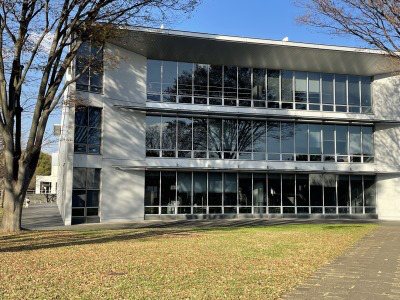

[
  "イオタ館。メディアセンターやメディアセンター棟がある。</s>",
  "イオタ館。メディアセンターやメディアセンター棟などがある。</s>",
  "オミクロン館。メディアセンターになっている。</s>",
  "イオタ館。メディアセンターとメディアセンターの間。</s>",
  "イオタ館。メディアセンターやメディアセンター棟がある</s>"
]


In [ ]:
pil_image, captions = cocosfcoco_predictor.caption(image_fpath=image_fpath, beam_size=5)
display(pil_image) # 画像を表示
print(json.dumps(captions, indent=2, ensure_ascii=False)) # キャプションを表示